# Visão Computacional - Encontrando as guias - Parte 2


## Da parte 1...

A seguir iremos colocar tudo o que apreendemos na parte 1 dentro de uma mesma função

Primeiramente vamos colocar a transformação `Canny()` em uma função separada do corpo principal.

In [2]:
import cv2 
import numpy as np

In [3]:

def canny(image):
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

image = cv2.imread('test_image.jpg')
image_estrada = np.copy(image)
canny_image = canny(image_estrada)


In [4]:
cv2.imshow("Resultado", canny)
cv2.waitKey(0)

-1

<div , align = 'center'>
    <img src="Slide10.png" style="width:800px;height:500px;">
</div>    

## 4. Região de Interesse

Na imagem a seguir podemos demostrar o que queremos fazer neste modulo. Queremos construir uma máscara que possa "focar" na informação dentro da área demarcada.

<div , align = 'center'>
    <img src="Slide11.png" style="width:800px;height:500px;">
</div>

Agora iremos chamar a biblioteca `matplotlib.pyplot`

In [5]:
import matplotlib.pyplot as plt

Utilizaremos a função `plt.imshow()` para mostrar em um gráfico as coordenadas da figura

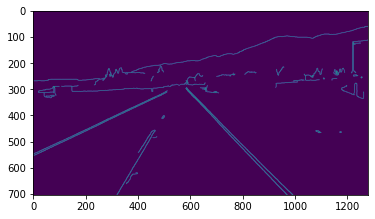

In [6]:
plt.imshow(canny_image)
plt.show()

Então na região demarcada com duas retas amarelas, aplicaremos a máscara

<div , align = 'center'>
    <img src="Slide12.png" style="width:800px;height:500px;">
</div>

A função a seguir é para criar um região solida delimitada pelos 3 pontos:

In [7]:
def regiao_de_interresse(image):
    altura = image.shape[0]             # O modulo shape retorna 3 valor de um vetor (altura, largura e comprimento) 
                                        # caso seja 3-d
                                        # Queremos apenas o primeiro elemento
    triangulo = np.array([[(220,altura), (1100,altura),(550,250)]]) 
    mask = np.zeros_like(image)         # Criamos um retangulo inteiramente preto 
    cv2.fillPoly(mask, triangulo, 255)  # no retangulo preto, sobrepomos com o trinagulo e prenchemos essa regiao 
                                        # de branco
    return mask

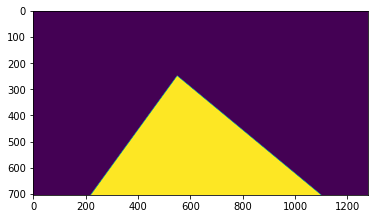

In [8]:
plt.imshow(regiao_de_interresse(canny))
plt.show()

Resultado: 
<div , align = 'center'>
    <img src="Slide13.png" style="width:800px;height:500px;">
</div>

### 5. Bitwise_and

Utilizando a lógica binária poderemos combinar as duas imagens , através do operador lógico `&`. Como cada matrix possui as mesmas dimensões podemos realizar essa operação para delimitar na imagem Canny uma região que estava delimitada pelo triangulo.

In [9]:
def regiao_de_interresse(image):
    altura = image.shape[0]                                           
    triangulo = np.array([[(220,altura), (1100,altura),(550,250)]]) 
    mask = np.zeros_like(image)         
    cv2.fillPoly(mask, triangulo, 255) 
    mask_image = cv2.bitwise_and(image,mask)
    return mask_image

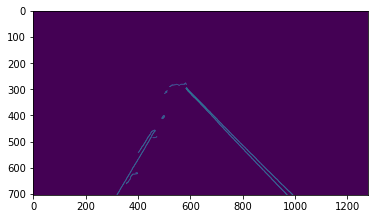

In [10]:
cropado = regiao_de_interresse(canny)
plt.imshow(regiao_de_interresse(cropado)) 
plt.show()